In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [31]:
anime_data = pd.read_csv("Top_Anime_Data.csv")

In [32]:
anime_data.head()

,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Eps,...,Premiered,Broadcast,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating
0,9.38,285,1,707,During their decade-long quest to defeat the D...,Frieren at the Funeral,葬送のフリーレン,Frieren: Beyond Journey's End,TV,28,...,Fall 2023,Fridays at 23:00 (JST),"Aniplex, Dentsu, Shogakukan-Shueisha Productio...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, FantasyFantasy",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
1,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist Brotherhood,TV,...,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, DramaDrama, ...",MilitaryMilitary,ShounenShounen
2,9.07,13,3,2,Eccentric scientist Rintarou Okabe has a never...,STEINS;GATE,Steins;Gate,TV,24,Finished Airing,...,Wednesdays at 02:05 (JST),"Frontier Works, Media Factory, Kadokawa Shoten...",Funimation,White Fox,Visual novel,"DramaDrama, Sci-FiSci-Fi, SuspenseSuspense","PsychologicalPsychological, Time TravelTime Tr...",24 min. per ep.,PG-13 - Teens 13 or older,"9.071 (scored by 13981241,398,124 users) 1 ind..."
3,9.06,342,4,629,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama' (2015),銀魂°,Gintama Season 4,Gintama Season 4,Gintama Temporada 4,...,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Sci-FiSci-Fi"
4,9.05,21,5,2,Seeking to restore humanity's diminishing hope...,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,Attack on Titan Staffel 3 Teil 2,Ataque a los Titanes Temporada 3 Parte 2,L'Attaque des Titans Saison 3 Partie 2,...,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,Mondays at 00:10 (JST),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"ActionAction, DramaDrama, SuspenseSuspense","GoreGore, MilitaryMilitary, SurvivalSurvival"


In [33]:
anime_data.isnull().sum()

Score          0
Popularity     0
Rank           0
Members        0
Description    0
Synonyms       0
Japanese       0
English        1
Type           1
Eps            0
Status         0
Aired          0
Premiered      0
Broadcast      0
Producers      0
Licensors      0
Studios        0
Source         0
Genres         0
Demographic    0
Duration       0
Rating         0
dtype: int64

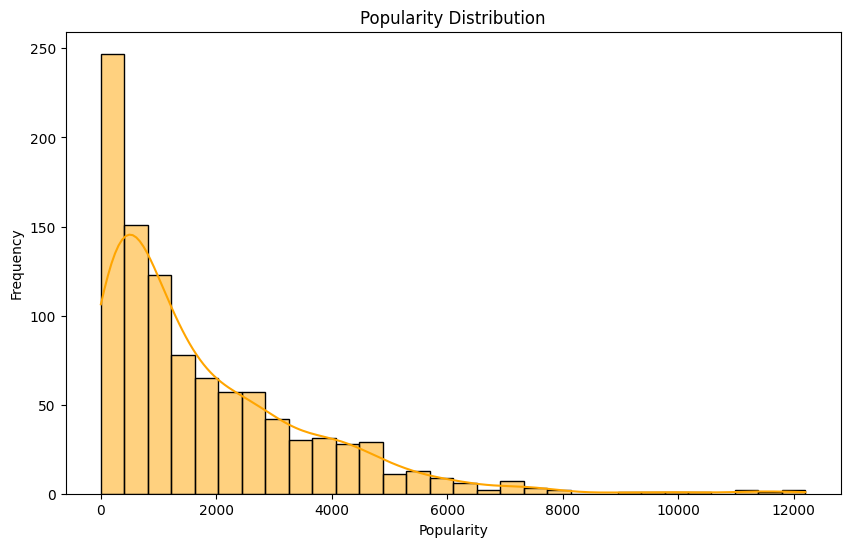

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(anime_data['Popularity'], bins=30, kde=True, color='orange')
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

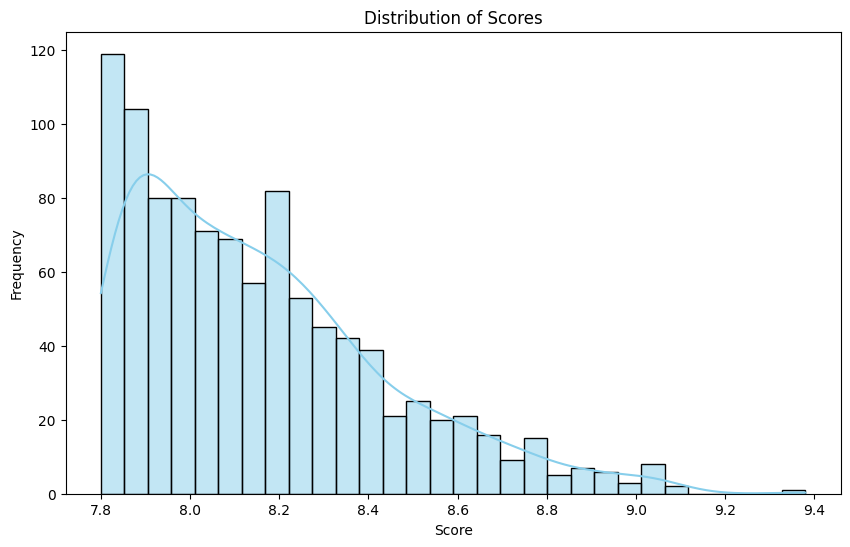

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(anime_data['Score'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

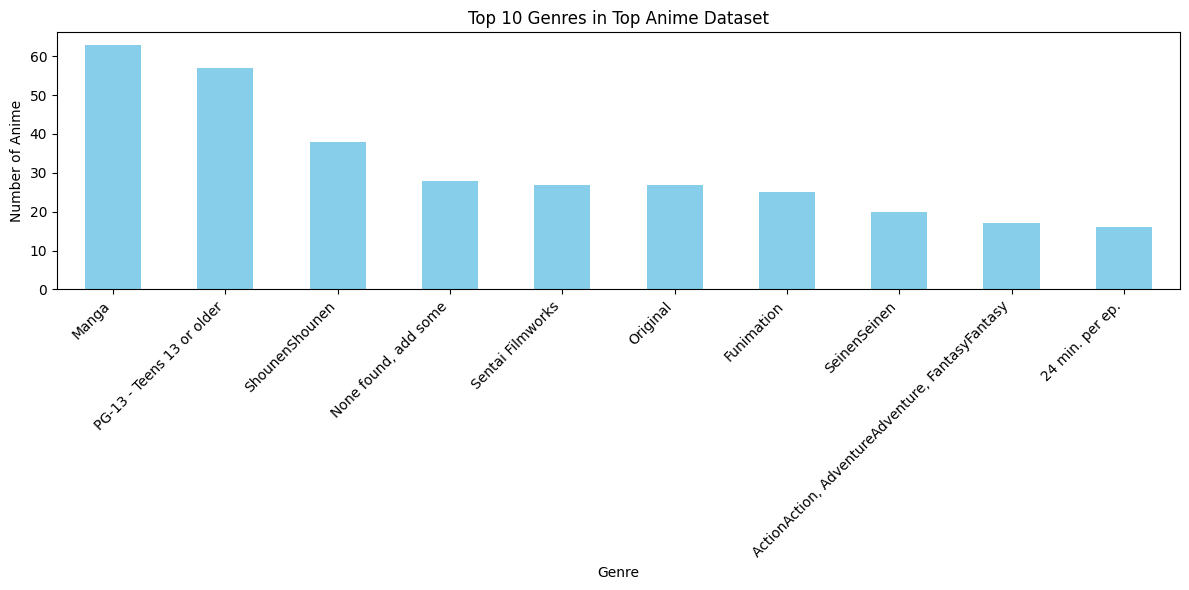

In [36]:
genre_counts = anime_data['Genres'].value_counts().head(10)
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres in Top Anime Dataset')
plt.xlabel('Genre')
plt.ylabel('Number of Anime')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

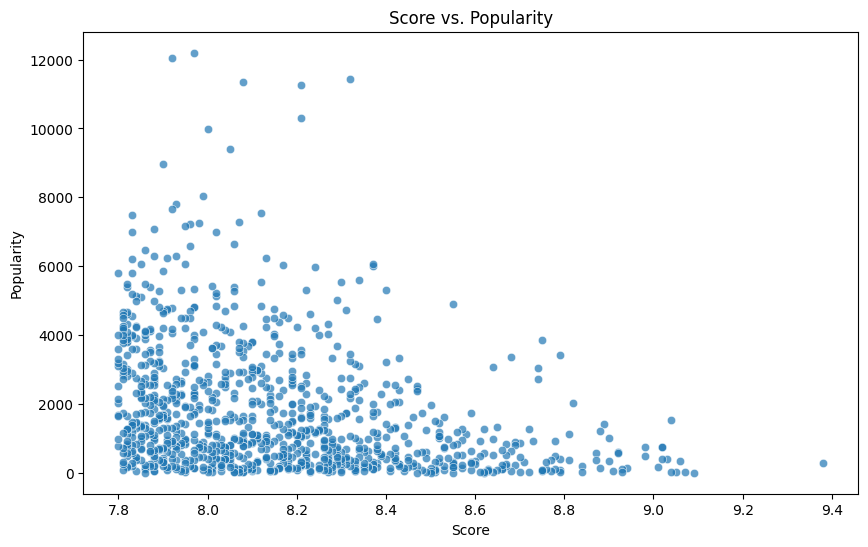

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Score', y='Popularity', data=anime_data, alpha=0.7)
plt.title('Score vs. Popularity')
plt.xlabel('Score')
plt.ylabel('Popularity')
plt.show()

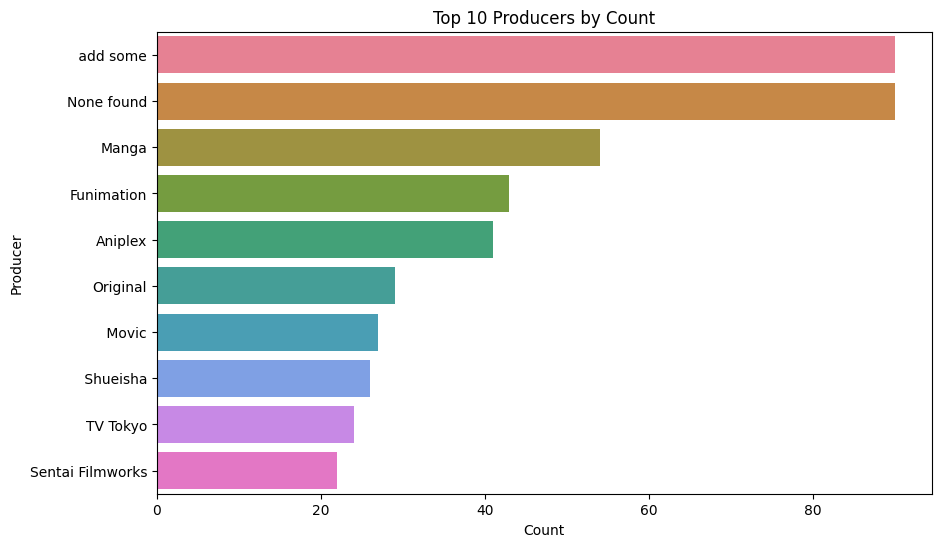

In [38]:
top_producers = anime_data['Producers'].str.split(',').explode().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_producers.values, y=top_producers.index, palette='husl')
plt.title('Top 10 Producers by Count')
plt.xlabel('Count')
plt.ylabel('Producer')
plt.show()

In [51]:
selected_features = ['Score', 'Rank', 'Members', 'Genres']
label_encoder = LabelEncoder()
anime_data['Genres'] = label_encoder.fit_transform(anime_data['Genres'])
anime_data['Score'] = label_encoder.fit_transform(anime_data['Score'])
anime_data['Rank'] = label_encoder.fit_transform(anime_data['Rank'])
anime_data['Members'] = label_encoder.fit_transform(anime_data['Members'])
X = anime_data[selected_features]
y = anime_data['Popularity']

In [52]:
#Splitting the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [54]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
pseudo_accuracy = (1 - (mse_test / mse_train)) * 100
print(f"Pseudo-Accuracy: {pseudo_accuracy:.2f}%")

Pseudo-Accuracy: 6.07%
